In [1]:
import matplotlib.pyplot as plt
import shap
import pickle
import cloudpickle
import numpy as np
import scipy as sp
import pandas as pd
from comparers import ModelComparer, plot_decision_boundary
from explainers import generate_shap_explanations, calc_feature_order, calc_class_order,\
                       plot_feature_importance_bar, plot_class_importances
from clustering import make_clustering
from tasks.feature_ignored import make_task
shap.initjs()
%matplotlib inline

In [2]:
clf_a, clf_b, X, y, feature_names, feature_precisions = make_task()

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
class DiffClassifier:
    def __init__(self, clf_a, clf_b, label):
        self.clf_a = clf_a
        self.clf_b = clf_b
        self.label = label
        self.classes_ = clf_a.classes_
        
    def predict_log_odds_diff(self, X):
        pred_a = comp
        
    def fit(self, X, y):
        return self
    
    def predict(self, X):
        return self.base_clf.predict(self._modify(X))
    
    def predict_proba(self, X):
        return self.base_clf.predict_proba(self._modify(X))
    
    def predict_log_proba(self, X):
        
        return self.base_clf.predict_log_proba(self._modify(X))

In [4]:
class_00_idx = list(comparer.class_names).index('(0, 0)')
class_01_idx = list(comparer.class_names).index('(0, 1)')
class_11_idx = list(comparer.class_names).index('(1, 1)')

In [5]:
def predict_log_odds_diff(X):
    log_odds = comparer.predict_mclass_diff_log_odds(X)
    log_odds[:, class_00_idx] -= log_odds[:, class_01_idx]
    log_odds[:, class_11_idx] -= log_odds[:, class_01_idx]
    return log_odds[:, [class_00_idx, class_11_idx]]

In [7]:
class_names = comparer.class_names[[class_00_idx, class_11_idx]]

In [14]:
masker = shap.maskers.Independent(X, len(X))
explainer = shap.Explainer(predict_log_odds_diff, masker, output_names=class_names, feature_names=feature_names)

In [15]:
%%time
shap_values = explainer(X)

CPU times: user 4.7 s, sys: 72.9 ms, total: 4.78 s
Wall time: 4.84 s


In [24]:
if shap_values.output_names is None:
    shap_values = shap.Explanation(shap_values.values, shap_values.base_values, shap_values.data,
                                   shap_values.display_data, shap_values.instance_names,
                                   shap_values.feature_names, class_names)

In [21]:
from explainers import plot_forces, calc_instance_order, plot_feature_dependencies

In [25]:
instance_order = calc_instance_order(shap_values)
plot_forces(shap_values, instance_order=instance_order)

In [27]:
mclass_diff = comparer.class_names[comparer.predict_mclass_diff(X)]

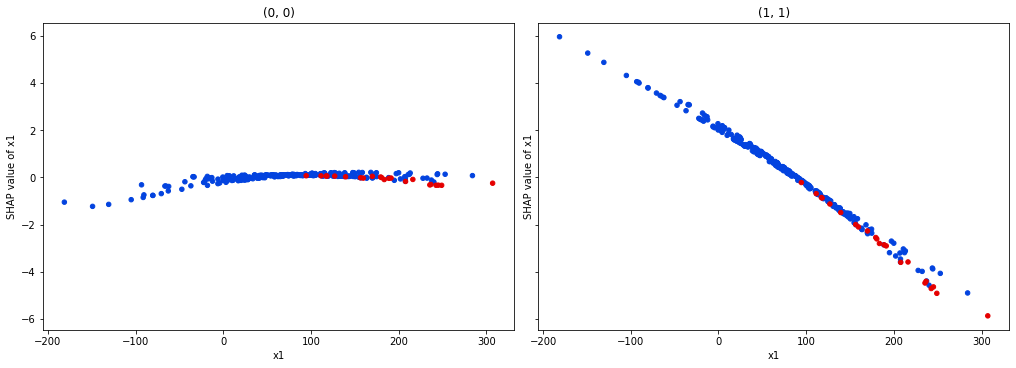

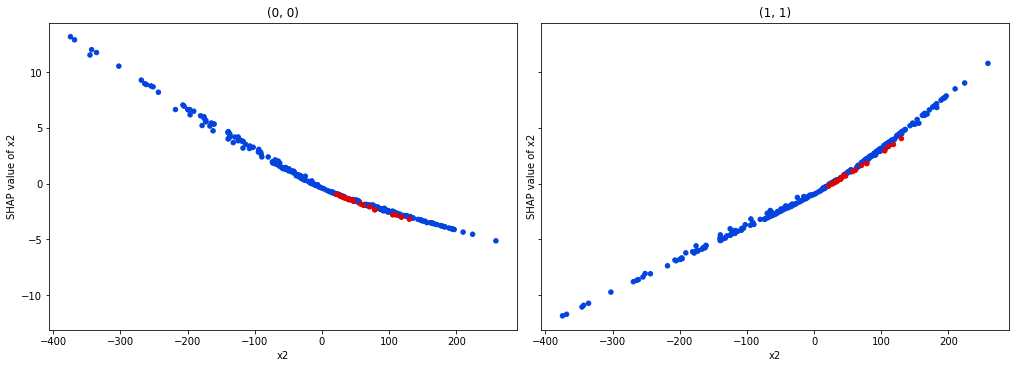

In [28]:
plot_feature_dependencies(shap_values, color=mclass_diff == '(0, 1)')